

# Install Package

!pip install Sastrawi !pip install plotly !pip install nltk !pip install tqdm !pip install gensim

In [ ]:
!pip install Sastrawi
!pip install plotly

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os

from sklearn.model_selection import train_test_split
from sklearn import metrics

import nltk
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding


from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

## Mounted Drive & Load Dataset





In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
df = pd.read_csv("/content/drive/MyDrive/Big Data Eka/Train1_stemmed_lemmatized_no_extra_stops.csv", usecols=["label", "text_lemmatize" ])

In [ ]:
df

,label,text_lemmatize
0,2,sound track beautiful paint senery mind well w...
1,2,im reading lot review saying best game soundtr...
2,2,soundtrack favorite music time hand intense sa...
3,2,truly like soundtrack enjoy video game music p...
4,2,youve played game know divine music every sing...
...,...,...
399993,1,sure trainer super easy set holy god loud know...
399994,2,sock aid cloth covered great hose sock tended ...
399995,1,book frustrating put japanese text tiny letter...
399996,2,came across book vacation cabin minnesota read...


In [ ]:
df.isnull().sum()

label             0
text_lemmatize    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399998 entries, 0 to 399997
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           399998 non-null  int64 
 1   text_lemmatize  399998 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
df.label.value_counts()

2    202066
1    197932
Name: label, dtype: int64

In [ ]:
temp = df.groupby('label').count()['text_lemmatize'].reset_index().sort_values(by='text_lemmatize',ascending=False)
temp.style.background_gradient(cmap='Blues')

,label,text_lemmatize
1,2,202066
0,1,197932


In [ ]:
temp = df.groupby('label').count()['selected_text'].reset_index().sort_values(by='selected_text',ascending=False)
temp.style.background_gradient(cmap='Blues')

KeyError: ignored

In [ ]:
# untuk melihat label yang berkategory 2
df[df["label"] == 2] ["text_lemmatize"].values[2]

'soundtrack favorite music time hand intense sadness prisoner fate mean youve played game hope distant promise girl stole star important inspiration personally throughout teen year higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb wellthis soundtrack amazing music probably best composer work havent heard xenogears soundtrack cant say sure even youve never played game would worth twice price buy iti wish could give star'

In [ ]:
# untuk melihat label yang berkategory 1
df[df["label"] == 1] ["selected_text"].values[1]

'complete waste time typographical errors poor grammar totally pathetic plot add absolutely nothing im embarrassed author disappointed actually paid book'

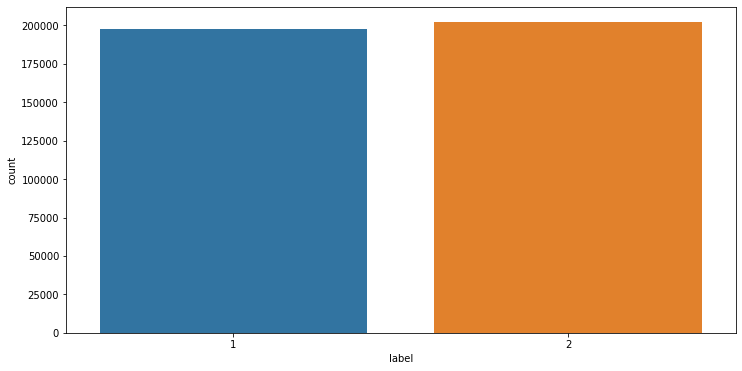

In [ ]:
# menampilkan data 
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=df)
#ternyata data inbalanced

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.label,
    values = temp.text_lemmatize,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution"}
    ))
fig.show()

In [ ]:
df['explore_list'] = df['text_lemmatize'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,book,248313
1,one,152579
2,like,117979
3,movie,106271
4,good,94974
5,would,89682
6,time,89193
7,great,88197
8,read,87337
9,get,80857


In [ ]:
df['explore_list'] = df['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,book,214356
1,one,145093
2,like,114857
3,good,94684
4,movie,90733
5,would,89682
6,great,87910
7,read,85187
8,get,70673
9,time,69743


In [ ]:
df['explore_list'] = df['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,book,214356
1,one,145093
2,like,114857
3,good,94684
4,movie,90733
5,would,89682
6,great,87910
7,read,85187
8,get,70673
9,time,69743


In [ ]:
# show the missing values
num_missing_text = np.sum(df['text_lemmatize'].isnull())
print('missing values: {}'.format(num_missing_text))

missing values: 0


### **Preprocessing**

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopword_id(text):    
  
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    #more_stopword = ['yg','ga','gak', 'tdk','nya','ada','tidak','baik']

    # Merge stopword
    data = stop_factory #+ more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text
#     return [word for word in text if word not in stopwords.words('indonesian')]

def remove_stopword_eng(text):
    return [word for word in text if word not in stopwords.words('english')]

def remove_stopword_in(text):    
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    #more_stopword = ['ada','tidak','baik','yg','ga','gak', 'tdk','nya']

    # Merge stopword
    data = stop_factory + more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text

def remove_stopword(text):
    #text = [word for word in text if word not in stopwords.words('indonesian')]
    text = [word for word in text if word not in stopwords.words('english')]
    return text

def clean_text(text):
    # lower text/case folding
    text = text.lower()
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    #remove puncutation
    text = text.translate(str.maketrans("","",string.punctuation))
    text = word_tokenize(text)
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = remove_stopword_eng(text)
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)    

#print('step 1')
# clean test dataset and stop word
#test["selected_text"] = test["reviewText"].apply(lambda x: remove_stopword_eng(x))
#test["selected_text"] = test["selected_text"].apply(lambda x: clean_text(x))

print('step 2')
# clean test dataset and stop word
#test["selected_text"] = test["reviewText"].apply(lambda x: remove_stopword_eng(x))
test["selected_text"] = test["reviewText"].apply(lambda x: clean_text(x))
print('done')

print('step 3')
#Create and save data to file csv
submission = pd.DataFrame({'label':df['label'],'reviewText':df['reviewText'],'selected_text':df['selected_text']})
# submission.head()
# filename = '[Sahabat Data]-Notebookv5.csv'
filename = 'Train2.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

#move file to drive
!mv /content/Train2.csv /content/drive/MyDrive/"Big Data Eka"/
print('Done')

In [ ]:
df.head()

,label,text_lemmatize,explore_list
0,2,sound track beautiful paint senery mind well w...,"[sound, track, beautiful, paint, senery, mind,..."
1,2,im reading lot review saying best game soundtr...,"[im, reading, lot, review, saying, best, game,..."
2,2,soundtrack favorite music time hand intense sa...,"[soundtrack, favorite, music, time, hand, inte..."
3,2,truly like soundtrack enjoy video game music p...,"[truly, like, soundtrack, enjoy, video, game, ..."
4,2,youve played game know divine music every sing...,"[youve, played, game, know, divine, music, eve..."


In [ ]:
final_clean = pd.DataFrame({'label':df['label'],'reviewText':df['selected_text']})
final_clean.head()
filename = 'Salinan Train1.csv'

final_clean.to_csv(filename,index=False)

print('Saved file: ' + filename)

#move file to drive
!mv /content/'Salinan Train1.csv' /content/drive/MyDrive/"Stemming"/
print('Done')

Saved file: Salinan Train1.csv
Done


In [ ]:
df_clean = pd.read_csv("/content/drive/MyDrive/Stemming/Salinan Train1.csv")

In [ ]:
df_clean.head()

,label,reviewText
0,2,sound track beautiful paints senery mind well ...
1,2,im reading lot reviews saying best game soundt...
2,2,soundtrack favorite music time hands intense s...
3,2,truly like soundtrack enjoy video game music p...
4,2,youve played game know divine music every sing...


In [ ]:
df_clean.isnull().sum()

label         0
reviewText    3
dtype: int64

In [ ]:
# importing modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
!pip install swifter

import swifter

ps = PorterStemmer()

def stemming(text):
  words = word_tokenize(text)
  tokenized_sentence = [] 
  for w in words:
    stemming = tokenized_sentence.append(ps.stem(w))
    stemming = " ".join(tokenized_sentence)
    print(w, " : ", ps.stem(w))

  return stemming

     |████████████████████████████████| 634kB 7.7MB/s 
     |████████████████████████████████| 296kB 15.3MB/s 
     |████████████████████████████████| 583kB 22.3MB/s 
     |████████████████████████████████| 112kB 35.9MB/s 
     |████████████████████████████████| 48.5MB 90kB/s 
     |████████████████████████████████| 17.2MB 265kB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 133kB 57.4MB/s 
     |████████████████████████████████| 3.1MB 38.0MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 1.3MB 35.3MB/s 
     |████████████████████████████████| 204kB 48.9MB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
     |████████████████████████████████| 296kB 57.3MB/s 
     |████████████████████████████████| 143kB 59.6MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-cp37-none-any.whl size=13980 sha256=c888f64c3e5d4f6a1340d19

# Feature Extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import nltk
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding


from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenizing 
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
texts = df['text_lemmatize']
tokenizer.fit_on_texts(texts)

# mengubah text ke angka
seq = tokenizer.texts_to_sequences(texts)

# Mengubah tweets(cleaning) menjadi list urutan dari index
#print("Index: "+str(tokenizer.word_index))

# Mengurutkan 
#print("Seq. corpus:"+str(seq))


In [ ]:
# Mengubah tweets(cleaning) menjadi list urutan dari index
str(tokenizer.word_index)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Mengurutkan 
#print("Seq. corpus:"+str(seq))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# TF-IDF
encoded_tfidf = tokenizer.sequences_to_matrix(seq,mode="tfidf")
print("tfidf:")
print(encoded_tfidf)

NameError: ignored